In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp

#exclude this mc_run from the data to tune as target
mc_target = 6
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5',
 order=3, covariance = True, fit_obs = list(range(1,16)), mc_target = mc_target, cpu = True)
#take first two bins of first 15 observables (which have 8 bins each)
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins, mc_target = mc_target)
summer_tune_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins, mc_target = mc_target)


target deviation 32.0585, with confidence level 0.6827, edof 29.0000
target deviation 32.0585, with confidence level 0.6827, edof 29.0000


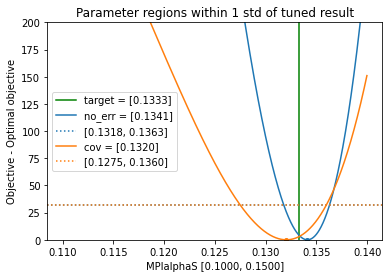

In [ ]:
graph_range = [0.11, 0.14]
summer_tune_no_err.graph_objective(graph_range = graph_range, log_scale = False)
summer_tune_cov.graph_objective(new_figure = False, graph_range = graph_range, log_scale = False)

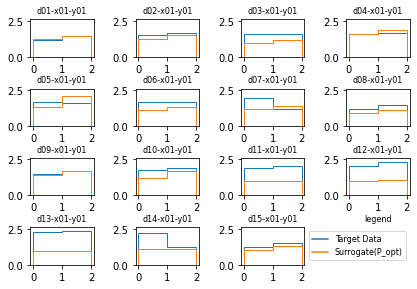

In [ ]:
summer_tune_cov.graph_tune_all()

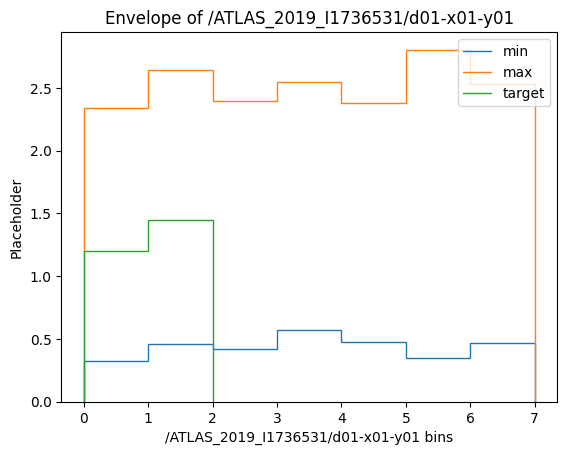

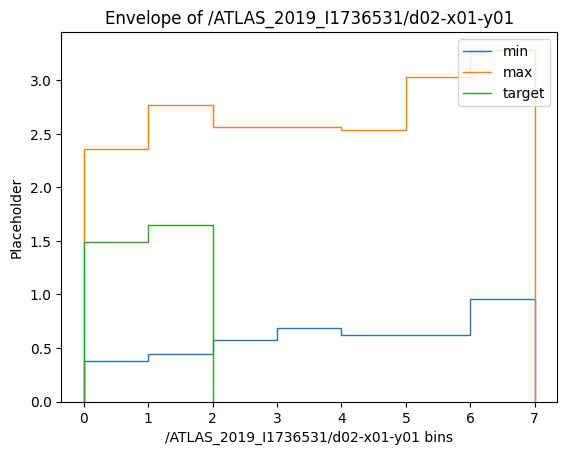

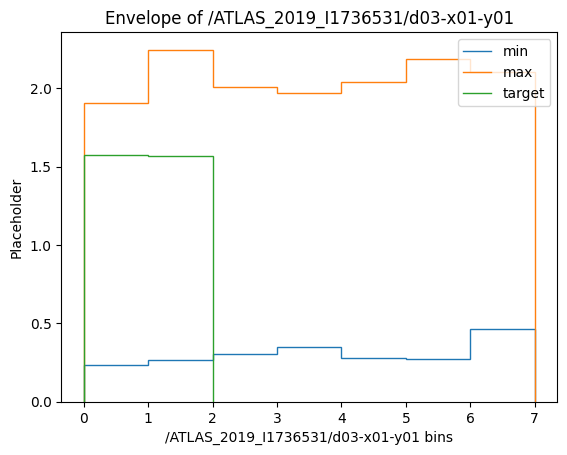

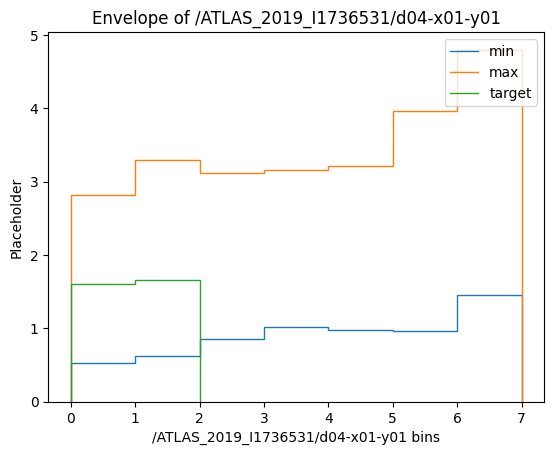

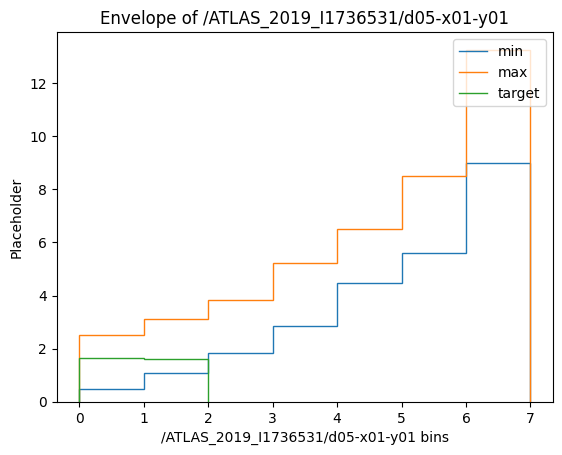

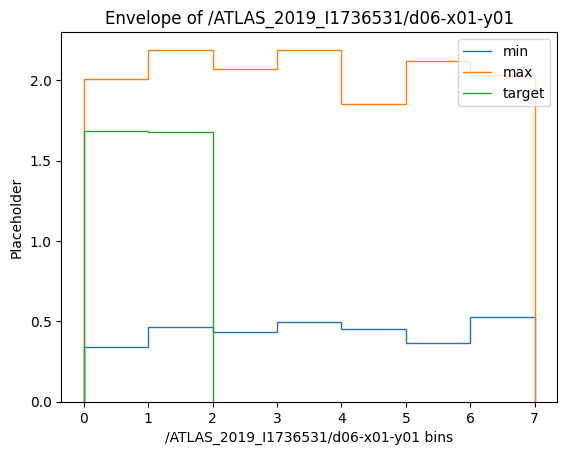

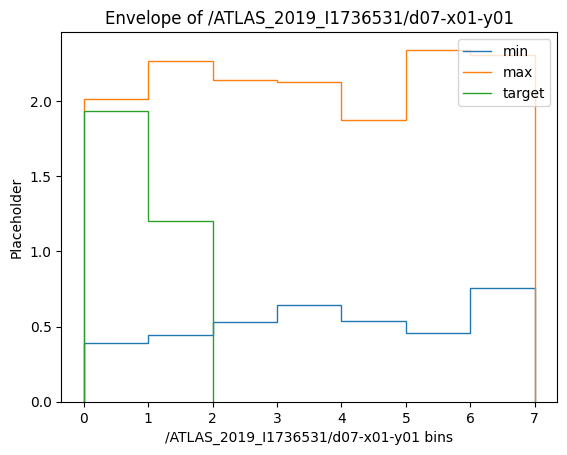

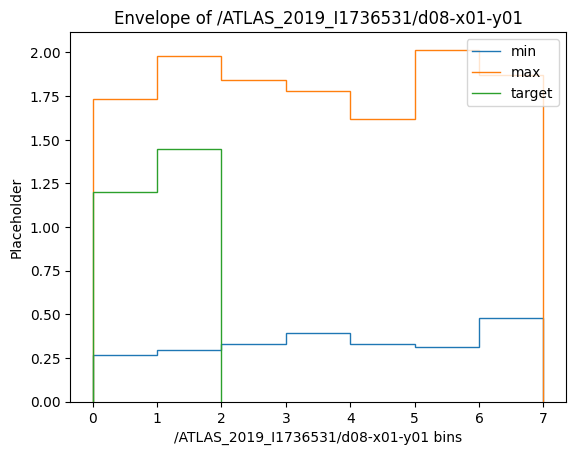

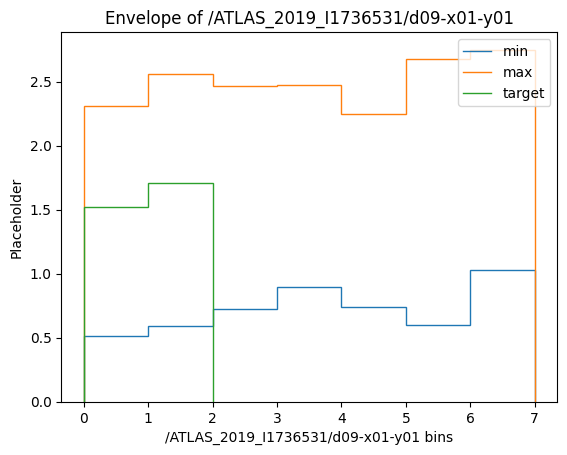

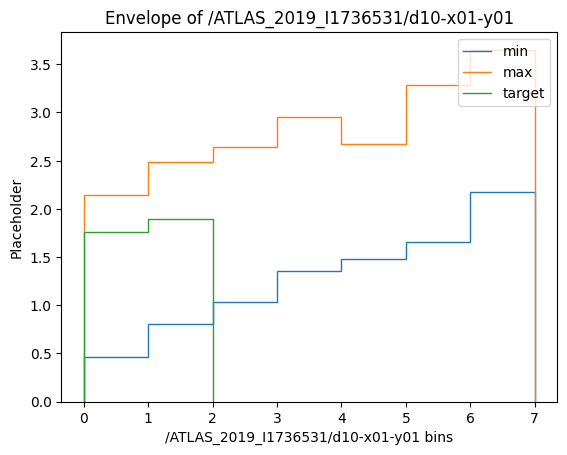

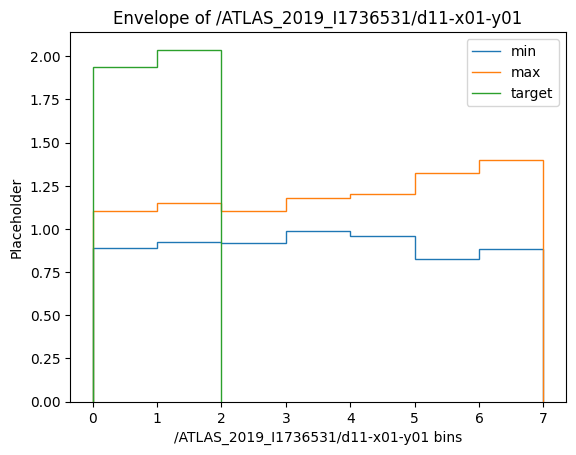

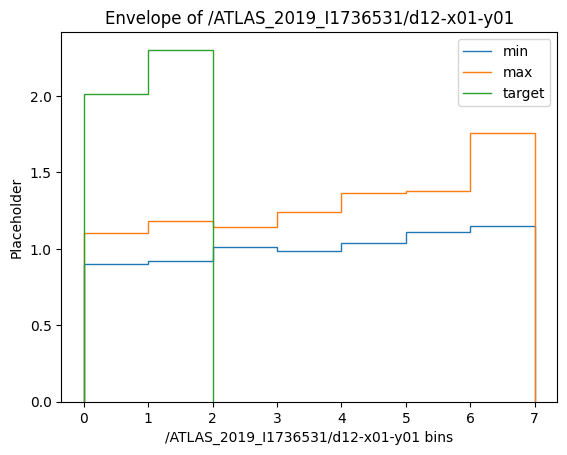

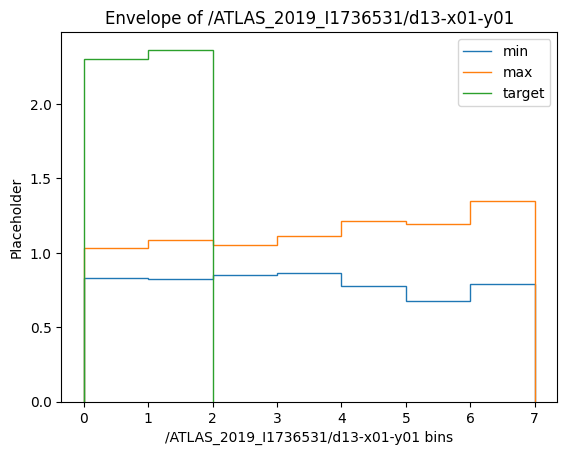

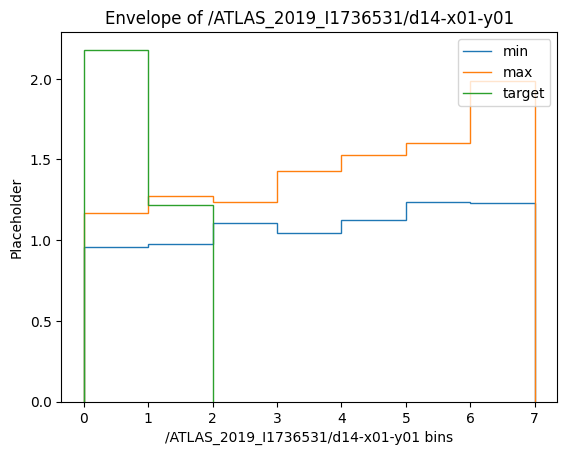

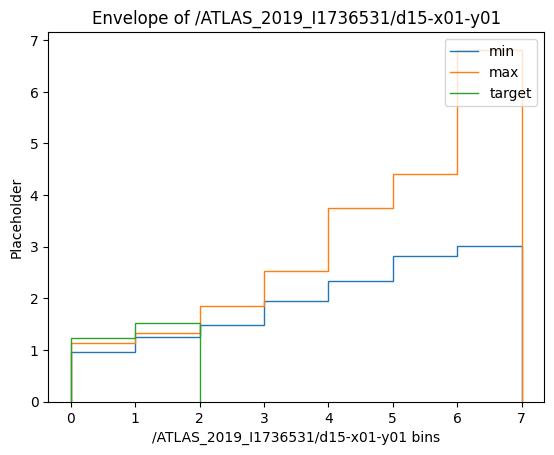

In [ ]:
summer_tune_no_err.graph_envelope_target()